C:\Users\POTATO~1\AppData\Local\Temp/ipykernel_10748/1220619839.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=labels, rotation=90) #显示x轴标签，并旋转90度


(<Figure size 3600x2700 with 1 Axes>,
 <AxesSubplot:>,
 ['0    2016-01-01\n1    2016-02-01\n2    2016-03-01\n3    2016-04-01\n4    2016-05-01\n5    2016-06-01\n6    2016-07-01\n7    2016-08-01\n8    2016-09-01\n9    2016-10-01\n10   2016-11-01\n11   2016-12-01\n12   2017-01-01\n13   2017-02-01\n14   2017-03-01\n15   2017-04-01\n16   2017-05-01\n17   2017-06-01\n18   2017-07-01\n19   2017-08-01\n20   2017-09-01\n21   2017-10-01\n22   2017-11-01\n23   2017-12-01\n24   2018-01-01\n25   2018-02-01\n26   2018-03-01\n27   2018-04-01\n28   2018-05-01\n29   2018-06-01\n30   2018-07-01\n31   2018-08-01\n32   2018-09-01\n33   2018-10-01\n34   2018-11-01\n35   2018-12-01\n36   2019-01-01\n37   2019-02-01\n38   2019-03-01\n39   2019-04-01\n40   2019-05-01\n41   2019-06-01\n42   2019-07-01\n43   2019-08-01\n44   2019-09-01\n45   2019-10-01\n46   2019-11-01\n47   2019-12-01\n48   2020-01-01\n49   2020-02-01\n50   2020-03-01\n51   2020-04-01\n52   2020-05-01\n53   2020-06-01\n54   2020-07-01\n55   20

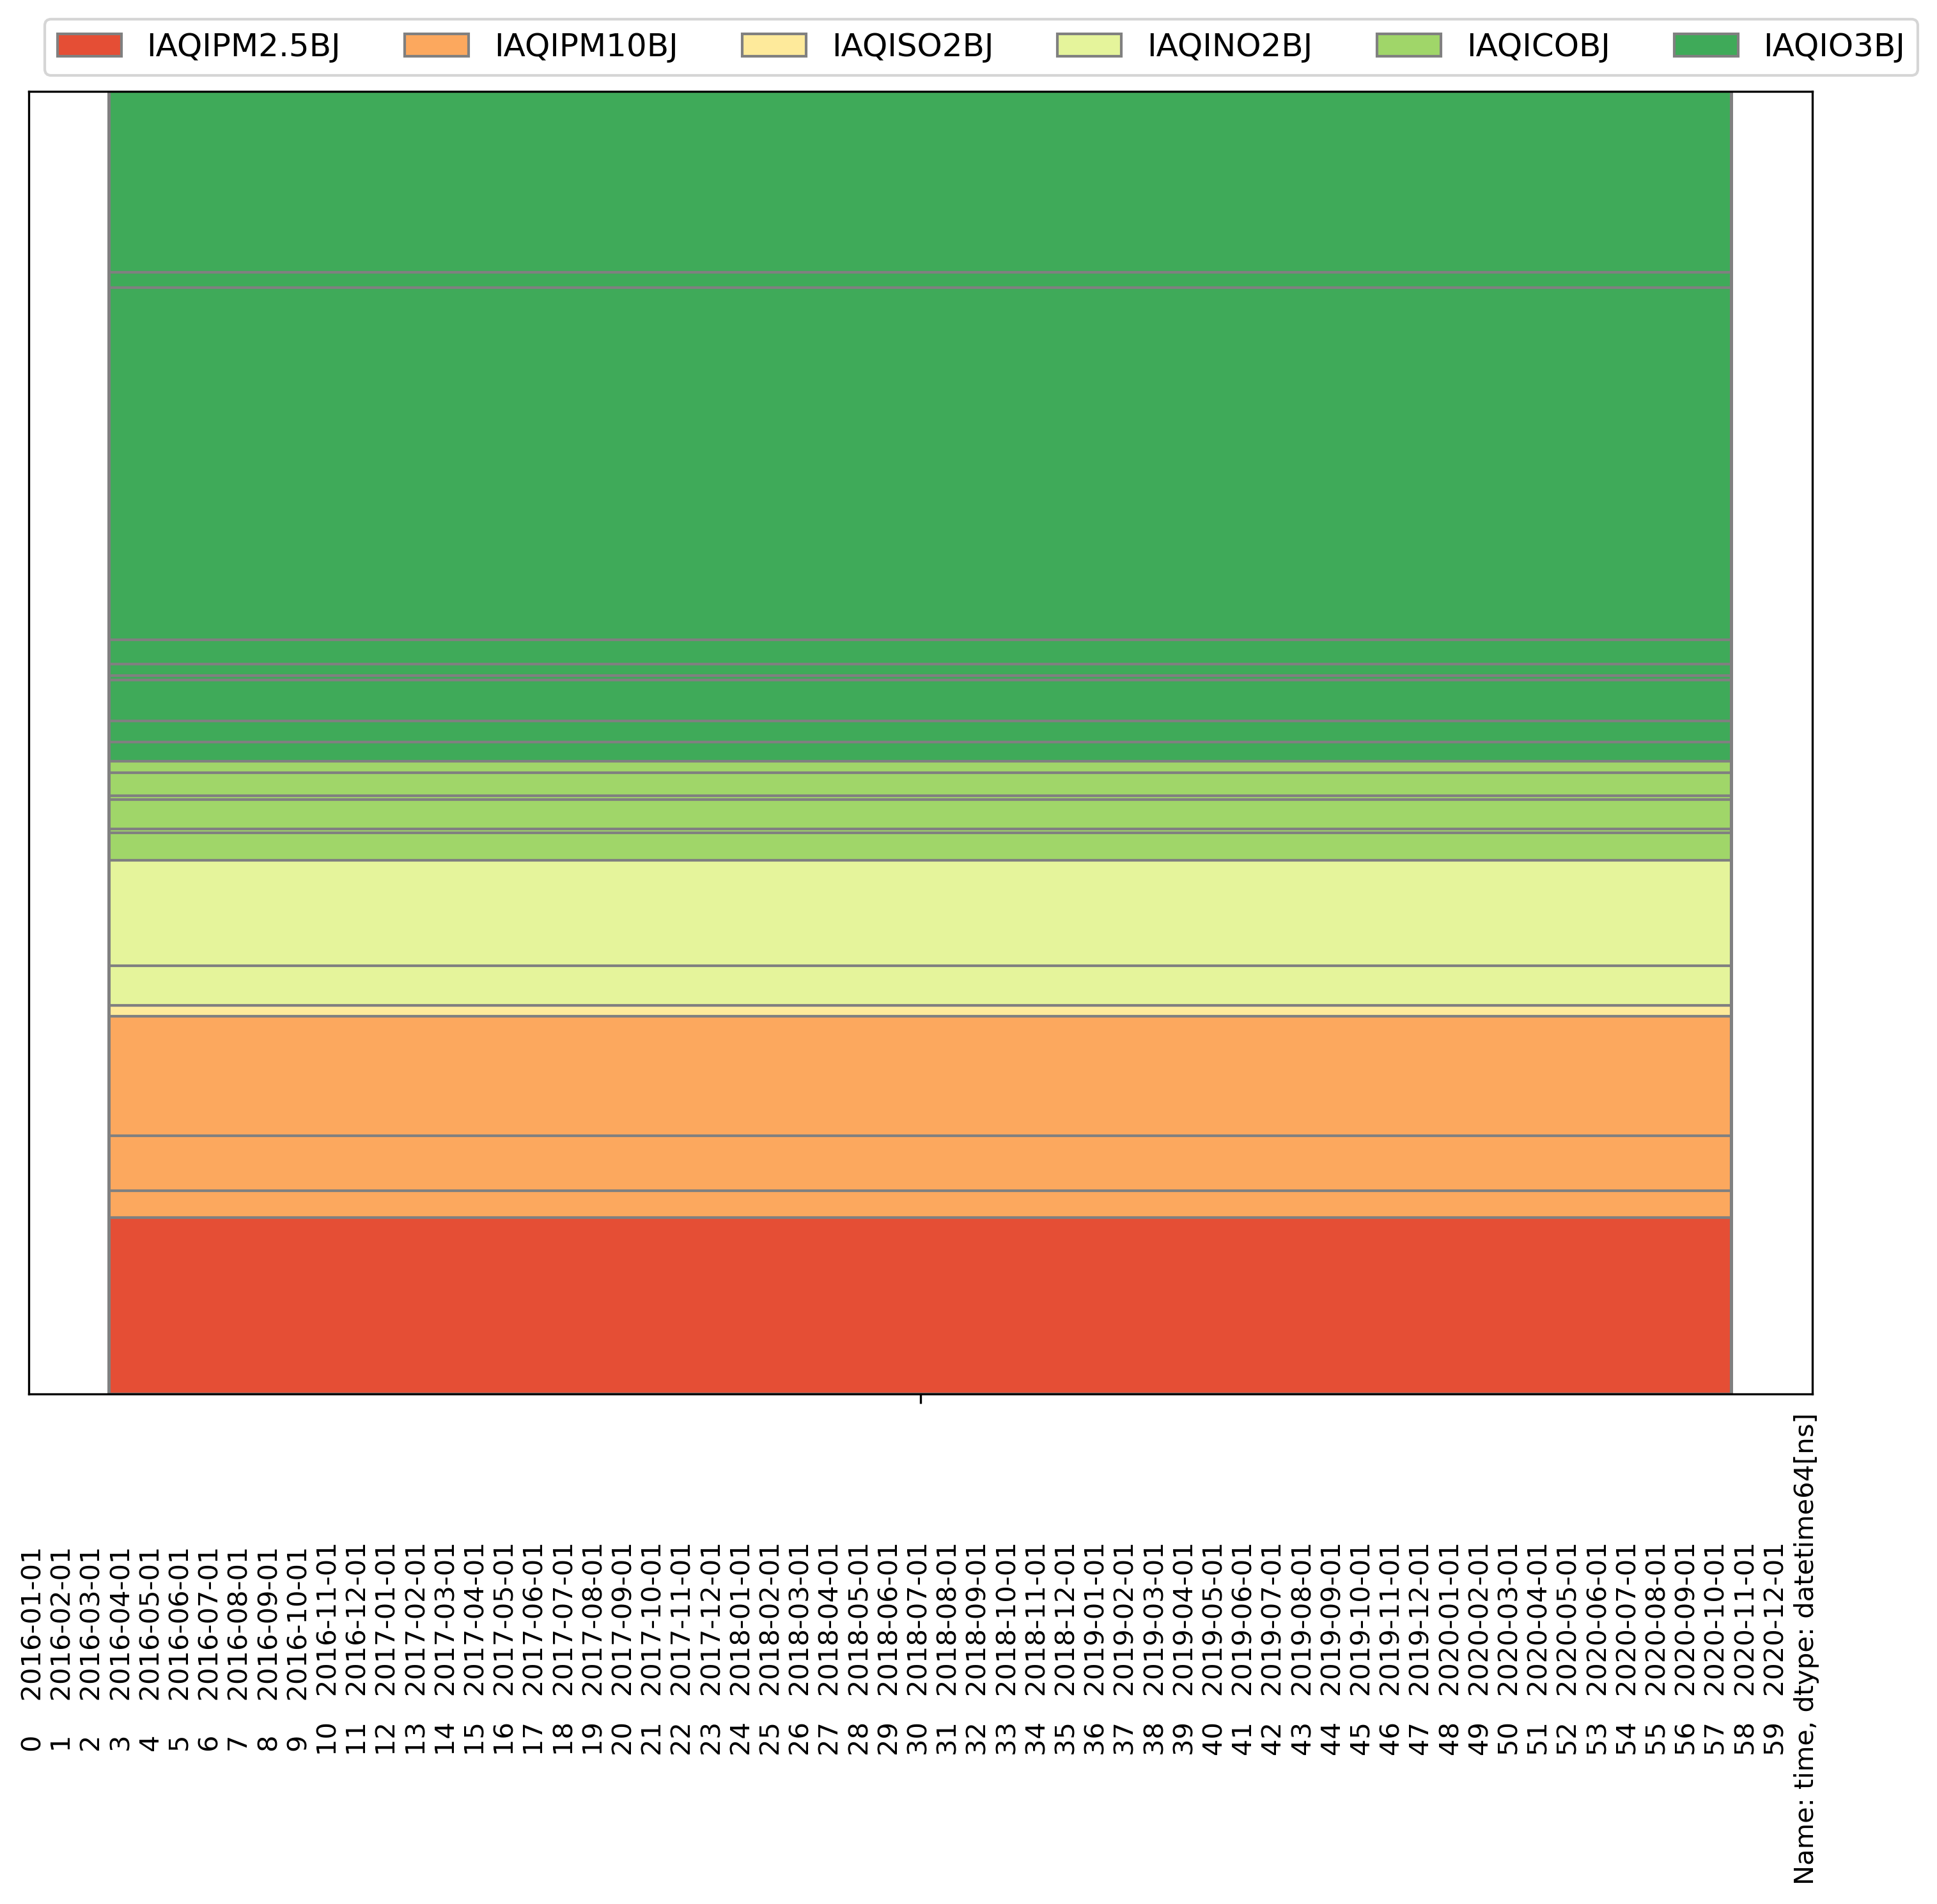

In [140]:
import pandas as pd
df = data.iloc[:,27:33]
df['time']=data['time']
df['t'] = str(df['time'])
df.columns.values
results = df.to_dict(orient = 'list')
category_names = list(results.keys())
def survey(df):
    data = pd.read_excel('data_v2.xlsx')
    labels = df['t'].tolist() #提取分类显示标签
    df = data.iloc[:,27:33]
    df.columns.values
    results = df.to_dict(orient = 'list') #将数值结果转化为字典
    category_names = list(results.keys()) # 提取字典里面的类别（键-key）
    data = np.array(list(results.values())) #提取字典里面的数值（值-value）

    category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, data.shape[0])) 
    #设置占比显示的颜色，可以自定义，修改括号里面的参数即可，如下
    #category_colors = plt.get_cmap('hot')(np.linspace(0.15, 0.85, data.shape[0]))
    
    
    fig, ax = plt.subplots(figsize=(12, 9),dpi=300) #创建画布，开始绘图
    ax.invert_xaxis()#这个可以通过设置df中columns的顺序调整
    ax.yaxis.set_visible(False) #设置y轴刻度不可见
    ax.set_xticklabels(labels=labels, rotation=90) #显示x轴标签，并旋转90度
    ax.set_ylim(0,1) #设置y轴的显示范围
    starts = 0  #绘制基准
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        heights = data[i,: ]/ data.sum(axis =0) #计算出每次遍历时候的百分比
        ax.bar(labels, heights, bottom=starts, width=0.5,label=colname, color=color,edgecolor ='gray') # 绘制柱状图
        xcenters = starts + heights/2  #进行文本标记位置的选定
        starts += heights  #核心一步，就是基于基准上的百分比累加
        #print(starts) 这个变量就是能否百分比显示的关键，可以打印输出看一下
        percentage_text = data[i,: ]/ data.sum(axis =0) #文本标记的数据
        
        r, g, b, _ = color  # 这里进行像素的分割
        text_color = 'white' if r * g * b < 0.5 else 'k'  #根据颜色基调分配文本标记的颜色

    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='large') #设置图例
    return fig, ax,labels  #返回图像
survey(df)

In [127]:
df

,IAQIPM2.5BJ,IAQIPM10BJ,IAQISO2BJ,IAQINO2BJ,IAQICOBJ,IAQIO3BJ
0,91.250000,65.0,20,66.25,85.0,31.000000
1,61.250000,53.0,15,43.75,60.0,40.500000
2,122.500000,90.5,19,71.25,75.0,60.000000
3,91.250000,80.0,10,55.00,35.0,111.818182
4,73.750000,66.0,9,47.50,27.5,168.000000
5,80.000000,58.5,6,43.75,30.0,173.000000
6,92.500000,60.5,4,41.25,32.5,157.000000
7,65.000000,52.0,3,43.75,35.0,133.636364
8,75.000000,57.5,4,55.00,30.0,112.727273
9,111.250000,72.5,5,70.00,50.0,39.000000


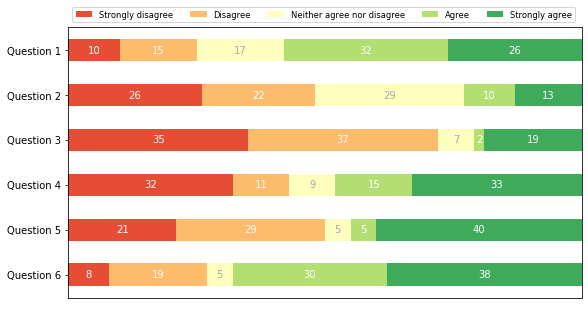

In [29]:

import numpy as np
import matplotlib.pyplot as plt

category_names = ['IAQIPM2.5BJ','IAQIPM10BJ', 'IAQISO2BJ', 'IAQINO2BJ',
       'IAQICOBJ', 'IAQIO3BJ']
#category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()


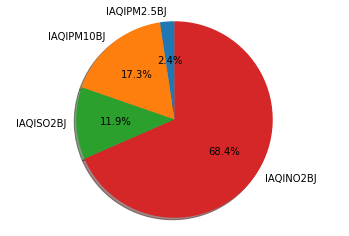

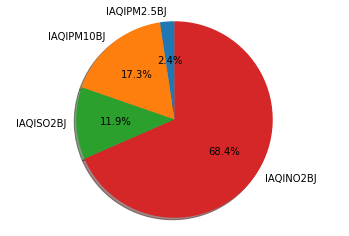

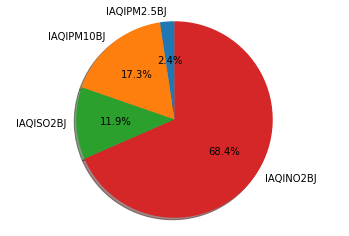

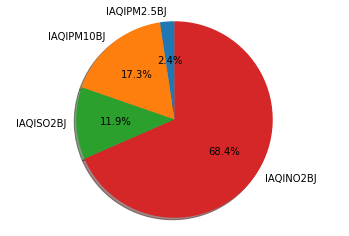

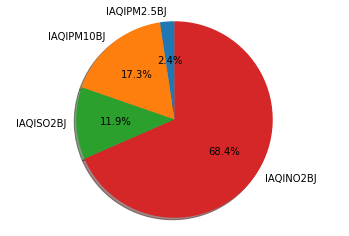

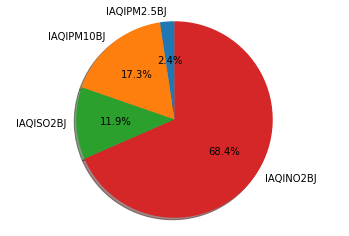

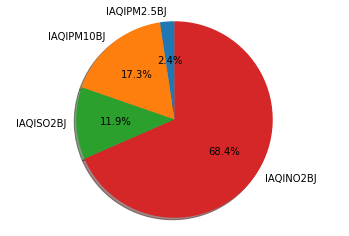

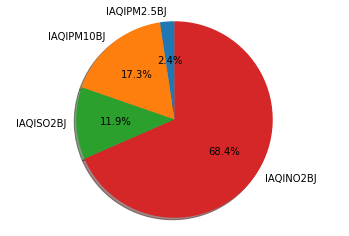

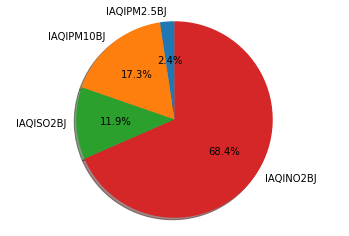

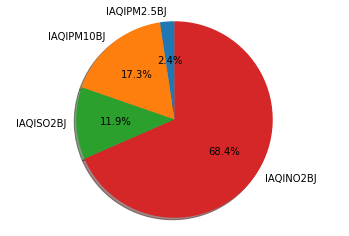

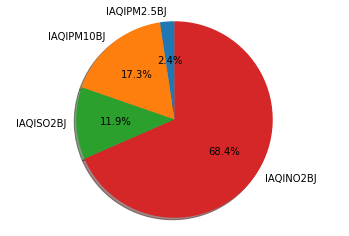

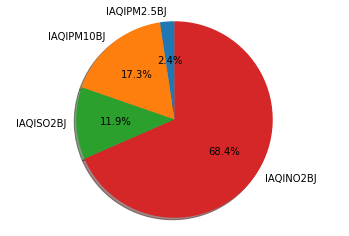

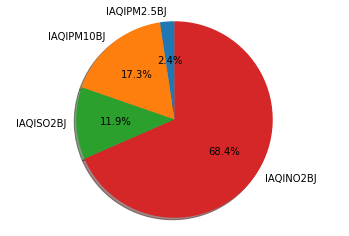

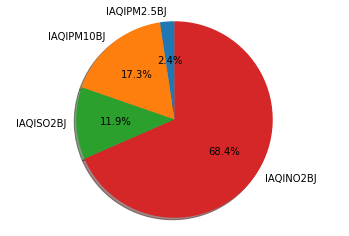

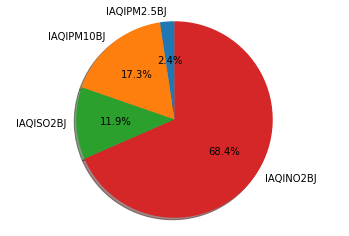

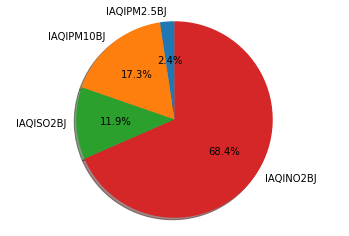

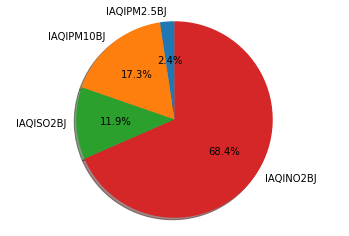

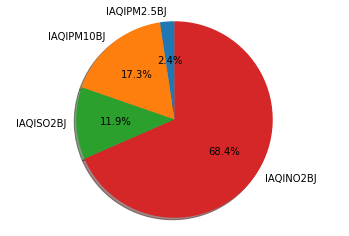

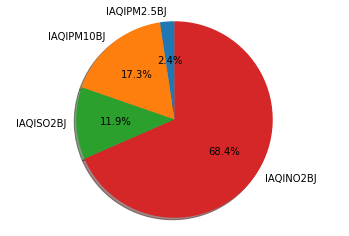

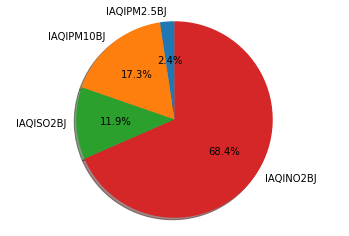

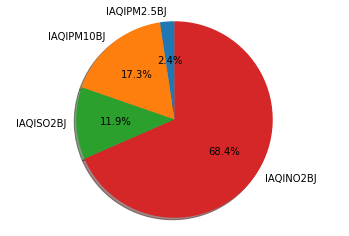

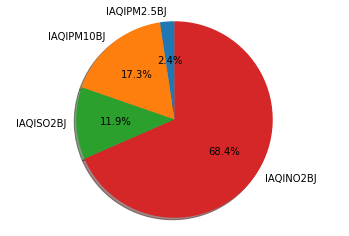

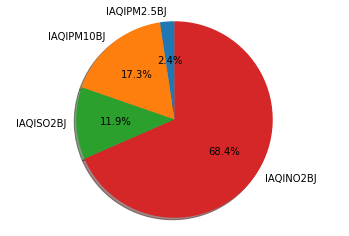

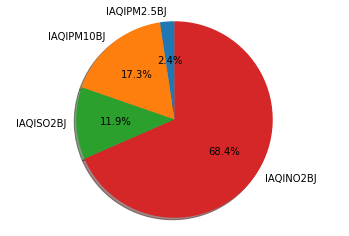

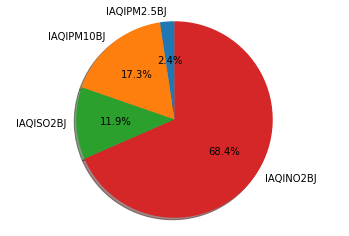

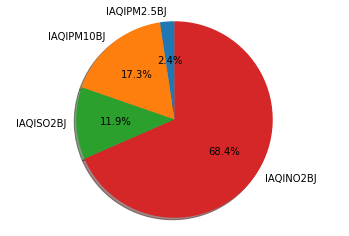

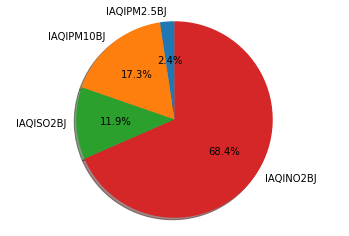

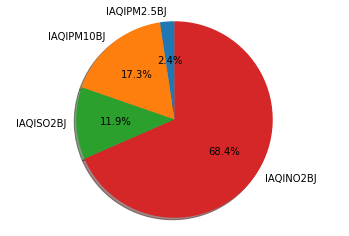

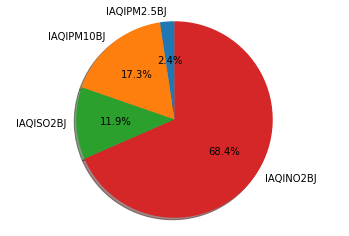

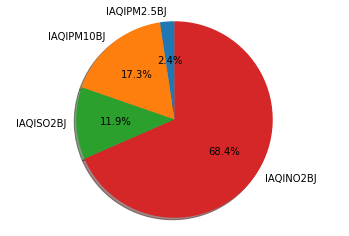

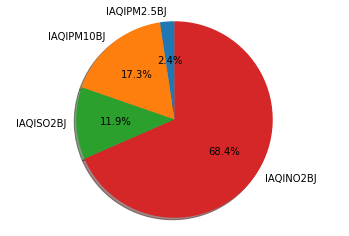

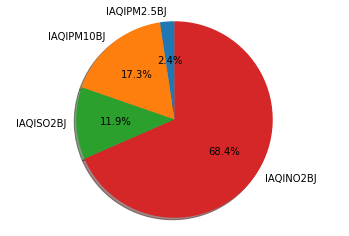

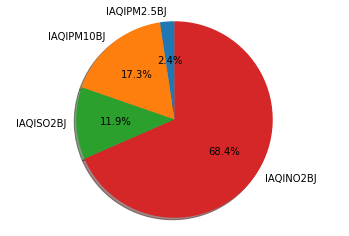

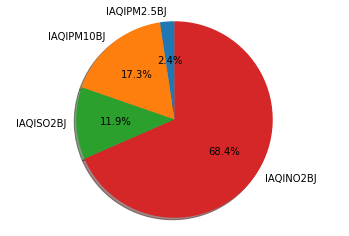

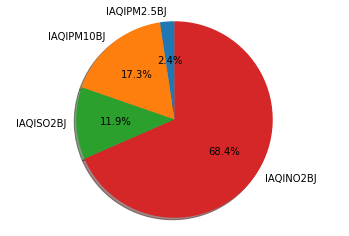

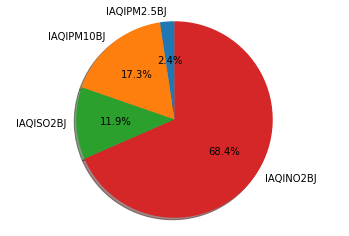

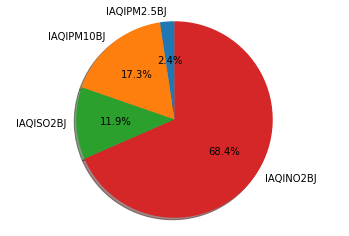

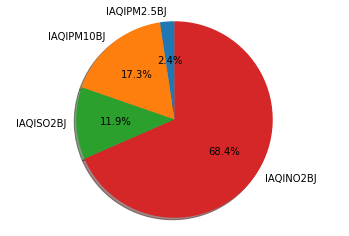

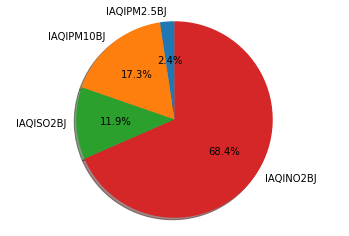

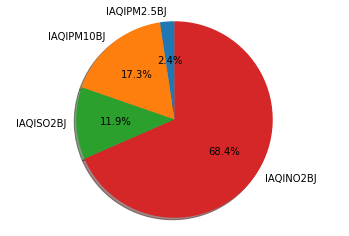

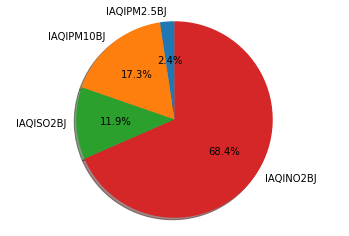

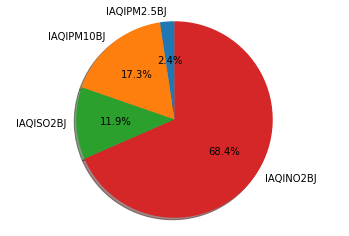

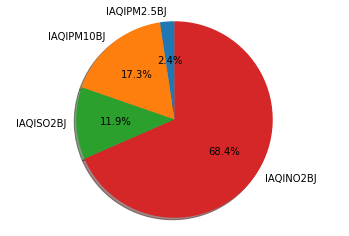

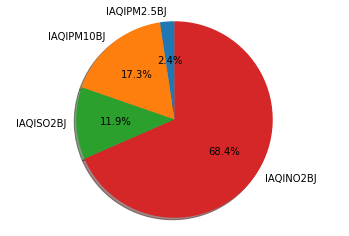

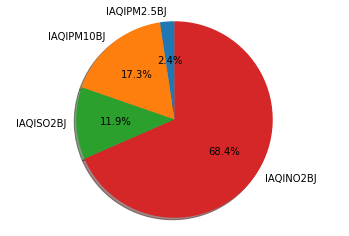

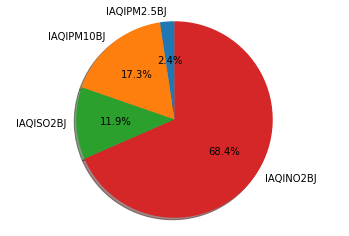

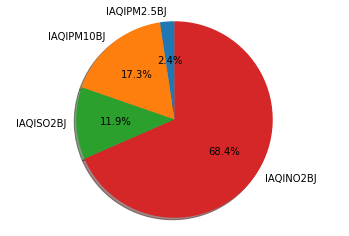

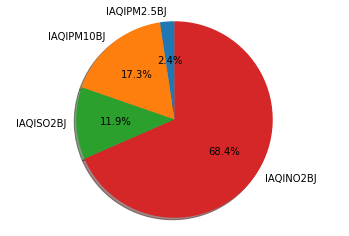

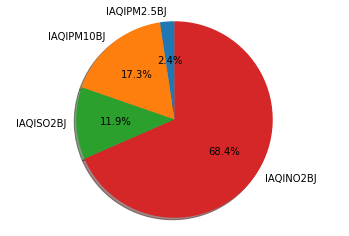

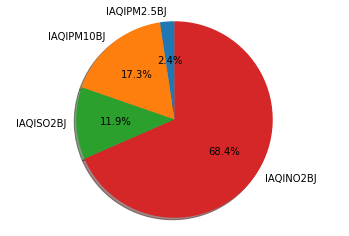

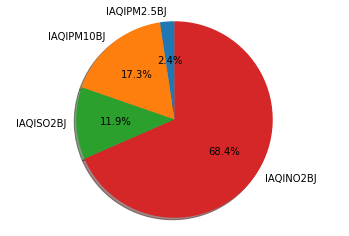

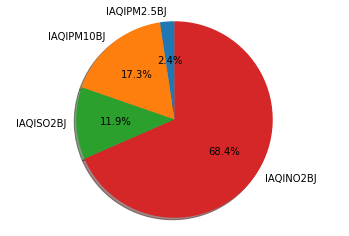

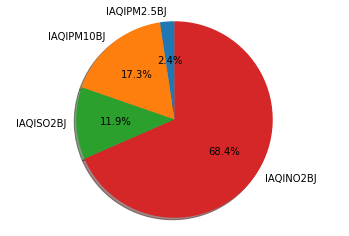

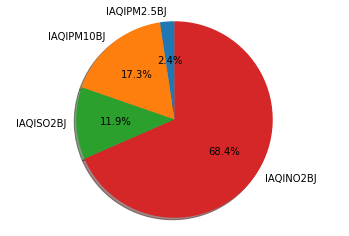

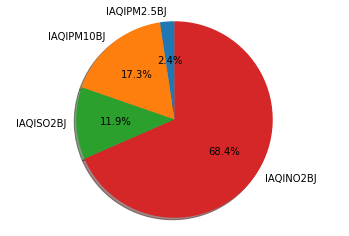

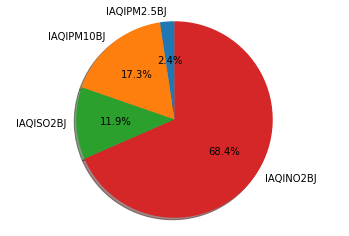

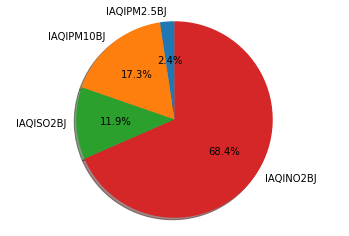

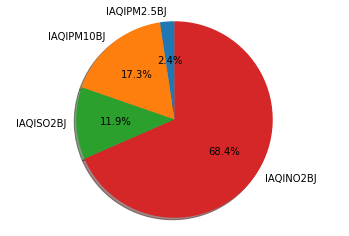

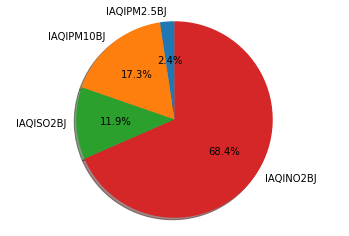

In [84]:
# Plot a pie（待修改）（各种污染物的iaqi/总iaqi画比例图，选定城市、时间）
#（以及每个城市空气质量等级占比：优秀良好等）
#（每个城市月主要污染物占比）
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
#名称
labels = ['IAQIPM2.5BJ','IAQIPM10BJ', 'IAQISO2BJ', 'IAQINO2BJ']
for i in range(0,59):
    
    #每块百分比
    sizes = df.iloc[5].values
    #哪块拎出来
    explode = (0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

    #不用改
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.pause(1)
    plt.show()

In [98]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker
from pyecharts.globals import ThemeType, CurrentConfig

CurrentConfig.ONLINE_HOST = 'D:/python/pyecharts-assets-master/assets/'
c = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.DARK))
    .add_xaxis(x_axis=Faker.days_attrs)
    .add_yaxis("商家A", y_axis=Faker.days_values)
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Bar-DataZoom（slider+inside）"),
        datazoom_opts=[opts.DataZoomOpts(), opts.DataZoomOpts(type_="inside")],
    )
    .render("bar_datazoom_both.html")
)

TypeError: add_xaxis() got an unexpected keyword argument 'x_axis'

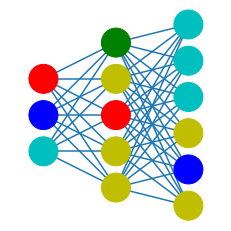

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.pyplot import Line2D
import random
import matplotlib.animation as animation


color_list=['r','g','b','c','y']
def draw_level(each_level):
    ylim=ax1.get_ylim()[1]
    xlim=ax1.get_xlim()[1]
    each_level=np.array(each_level)
    each_col=xlim/((len(each_level)))
    each_row=ylim/np.amax(each_level)
    radius=0.4*each_row
    for i,item in enumerate(each_level):
        start_point=ylim-(ylim-item*each_row)/2
        for j in range(item):
            light=int(random.random()*255)
            color =str( '%x' % light).zfill(2)
            # if i==0 :
            #     cir=Circle(xy=((i+0.5)*each_col,start_point-(j+0.5)*each_row),radius=radius,color='#'+color+color+color,zorder=999)
            # else:
            #     cir=Circle(xy=((i+0.5)*each_col,start_point-(j+0.5)*each_row),radius=radius,color='#000000',zorder=999)
            index=random.randint(0,len(color_list)-1)
            cir = Circle(xy=((i + 0.5) * each_col, start_point - (j + 0.5) * each_row), radius=radius,
                         color=color_list[ index], zorder=999)
            ax1.add_patch(cir)

def draw_line(each_level):
    ylim = ax1.get_ylim()[1]
    xlim = ax1.get_xlim()[1]
    each_level = np.array(each_level)
    each_col = xlim / ((len(each_level)) )
    each_row = ylim / np.amax(each_level)
    result=list()
    for i, item in enumerate(each_level):
        start_point = ylim - (ylim - item * each_row) / 2
        a = list()
        for j in range(item):
            a.append(start_point - (j + 0.5) * each_row)
        result.append(a)
    p1=result[0][1]
    # for i_next in result[1]:
    #         line=Line2D([(0.5)*each_col,(1.5)*each_col],[p1,i_next])
    #         ax1.add_line(line)



    for i in range(len(each_level)-1):
        for item in result[i]:
            for i_next in result[i+1]:
                line=Line2D([(i+0.5)*each_col,(i+1.5)*each_col],[item,i_next])
                ax1.add_line(line)

def init():
    ax1.set_xlim(0, 10)
    ax1.set_ylim(0, 10)
    ax1.set_aspect('equal')
    ax1.axis('off')
    draw_line(each_level)
    draw_level(each_level)

def animate(i):
    circles=ax1.patches
    for item in circles:
        # light = int(random.random() * 255)
        # color =str( '%x' % light).zfill(2)
        # item.set_facecolor('#'+color+color+color)
        index = random.randint(0, len(color_list) - 1)
        item.set_facecolor(color_list[ index])
        item.set_edgecolor(color_list[ index])

fig=plt.figure()

ax1=fig.add_subplot(111)

each_level=[3,5,6]

# fig.savefig('t13.png')
anim=animation.FuncAnimation(fig, animate,
                               init_func=init,
                               frames=100,
                               interval=600,
                               blit=False)
anim.save('demo_6.gif',writer='pillow')

In [103]:
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.faker import Faker
c = (
     #加了动画
    Bar(init_opts=opts.InitOpts(
            animation_opts=opts.AnimationOpts(
                animation_delay=100, animation_easing="elasticOut"
            )
        ))
    .add_xaxis(Faker.choose())
    .add_yaxis("商家A", Faker.values())
    .add_yaxis("商家B", Faker.values(), is_selected=False) #取消默认显示
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Bar-XY 轴名称",subtitle="slider-垂直"),
        yaxis_opts=opts.AxisOpts(name="我是 Y 轴",  # y轴名称
                                 axislabel_opts=opts.LabelOpts(formatter="{value} /月")),  #单位标注
        xaxis_opts=opts.AxisOpts(name="我是 X 轴"), #x轴名称
        datazoom_opts=opts.DataZoomOpts(orient="vertical",type_="inside"), #垂直 slider
    )
#标注最大值和最小值
    .set_series_opts(
        label_opts=opts.LabelOpts(is_show=False),
        markpoint_opts=opts.MarkPointOpts( 
            data=[
                opts.MarkPointItem(type_="min", name="最小值"), #这个用线拉
                 ]
        ),
        markline_opts=opts.MarkLineOpts( 
            data=[
                opts.MarkLineItem(type_="max", name="最大值"), #这个点标注
            ]
        ),
    )
    .render("bar_xyaxis_name.html")
)


In [104]:
# 2002 - 2011 年的数据
def get_year_overlap_chart(year: int) -> Bar:
    bar = (
        Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT)) #改了背景颜色
        .add_xaxis(xaxis_data=name_list) 
        .add_yaxis(
            series_name="GDP",
            y_axis=total_data["dataGDP"][year], #对y轴进行赋值最新版本不能用yaxis_data，要用y_axis
            is_selected=False,
            label_opts=opts.LabelOpts(is_show=False),
        )
        .add_yaxis(
            series_name="金融",
            y_axis=total_data["dataFinancial"][year],
            is_selected=False,
            label_opts=opts.LabelOpts(is_show=False),
        )
        .add_yaxis(
            series_name="房地产",
            y_axis=total_data["dataEstate"][year],
            is_selected=False,
            label_opts=opts.LabelOpts(is_show=False),
        )
        .add_yaxis(
            series_name="第一产业",
            y_axis=total_data["dataPI"][year],
            label_opts=opts.LabelOpts(is_show=False),
        )
        .add_yaxis(
            series_name="第二产业",
            y_axis=total_data["dataSI"][year],
            label_opts=opts.LabelOpts(is_show=False),
        )
        .add_yaxis(
            series_name="第三产业",
            y_axis=total_data["dataTI"][year],
            label_opts=opts.LabelOpts(is_show=False),
        )
        .set_global_opts(
            title_opts=opts.TitleOpts(
                title="{}全国宏观经济指标".format(year), subtitle="数据来自国家统计局"
            ),
            tooltip_opts=opts.TooltipOpts(
                is_show=True, trigger="axis", axis_pointer_type="shadow"
            ),
        )
    )
    pie = (
        Pie()
        .add(
            series_name="GDP占比",
            data_pair=[
                ["第一产业", total_data["dataPI"]["{}sum".format(year)]],
                ["第二产业", total_data["dataSI"]["{}sum".format(year)]],
                ["第三产业", total_data["dataTI"]["{}sum".format(year)]],
            ],
            center=["75%", "35%"],
            radius="28%",
        )
        .set_series_opts(tooltip_opts=opts.TooltipOpts(is_show=True, trigger="item"))
    )
    return bar.overlap(pie)
# 生成时间轴的图
timeline = timeline(init_opts=opts.InitOpts(width="1200px", height="560px")) #长度 宽度设置
for y in range(2002,2012):  #时间轴 
    timeline.add(get_year_overlap_chart(year=y), time_point=str(y))
timeline.add_schema(is_auto_play=True, play_interval=1000) #自动播放与否，以及时间间隔
timeline.render("finance_indices.html")



TypeError: 'Timeline' object is not callable

In [102]:
import pyecharts.options as opts
from pyecharts.charts import Timeline, Bar, Pie

"""
Gallery 使用 pyecharts 1.1.0
参考地址: https://www.echartsjs.com/examples/editor.html?c=mix-timeline-finance

目前无法实现的功能:

1、暂无
"""
total_data = {}
name_list = [
    "北京",
    "天津",
    "河北",
    "山西",
    "内蒙古",
    "辽宁",
    "吉林",
    "黑龙江",
    "上海",
    "江苏",
    "浙江",
    "安徽",
    "福建",
    "江西",
    "山东",
    "河南",
    "湖北",
    "湖南",
    "广东",
    "广西",
    "海南",
    "重庆",
    "四川",
    "贵州",
    "云南",
    "西藏",
    "陕西",
    "甘肃",
    "青海",
    "宁夏",
    "新疆",
]
data_gdp = {
    2011: [
        16251.93,
        11307.28,
        24515.76,
        11237.55,
        14359.88,
        22226.7,
        10568.83,
        12582,
        19195.69,
        49110.27,
        32318.85,
        15300.65,
        17560.18,
        11702.82,
        45361.85,
        26931.03,
        19632.26,
        19669.56,
        53210.28,
        11720.87,
        2522.66,
        10011.37,
        21026.68,
        5701.84,
        8893.12,
        605.83,
        12512.3,
        5020.37,
        1670.44,
        2102.21,
        6610.05,
    ],
    2010: [
        14113.58,
        9224.46,
        20394.26,
        9200.86,
        11672,
        18457.27,
        8667.58,
        10368.6,
        17165.98,
        41425.48,
        27722.31,
        12359.33,
        14737.12,
        9451.26,
        39169.92,
        23092.36,
        15967.61,
        16037.96,
        46013.06,
        9569.85,
        2064.5,
        7925.58,
        17185.48,
        4602.16,
        7224.18,
        507.46,
        10123.48,
        4120.75,
        1350.43,
        1689.65,
        5437.47,
    ],
    2009: [
        12153.03,
        7521.85,
        17235.48,
        7358.31,
        9740.25,
        15212.49,
        7278.75,
        8587,
        15046.45,
        34457.3,
        22990.35,
        10062.82,
        12236.53,
        7655.18,
        33896.65,
        19480.46,
        12961.1,
        13059.69,
        39482.56,
        7759.16,
        1654.21,
        6530.01,
        14151.28,
        3912.68,
        6169.75,
        441.36,
        8169.8,
        3387.56,
        1081.27,
        1353.31,
        4277.05,
    ],
    2008: [
        11115,
        6719.01,
        16011.97,
        7315.4,
        8496.2,
        13668.58,
        6426.1,
        8314.37,
        14069.87,
        30981.98,
        21462.69,
        8851.66,
        10823.01,
        6971.05,
        30933.28,
        18018.53,
        11328.92,
        11555,
        36796.71,
        7021,
        1503.06,
        5793.66,
        12601.23,
        3561.56,
        5692.12,
        394.85,
        7314.58,
        3166.82,
        1018.62,
        1203.92,
        4183.21,
    ],
    2007: [
        9846.81,
        5252.76,
        13607.32,
        6024.45,
        6423.18,
        11164.3,
        5284.69,
        7104,
        12494.01,
        26018.48,
        18753.73,
        7360.92,
        9248.53,
        5800.25,
        25776.91,
        15012.46,
        9333.4,
        9439.6,
        31777.01,
        5823.41,
        1254.17,
        4676.13,
        10562.39,
        2884.11,
        4772.52,
        341.43,
        5757.29,
        2703.98,
        797.35,
        919.11,
        3523.16,
    ],
    2006: [
        8117.78,
        4462.74,
        11467.6,
        4878.61,
        4944.25,
        9304.52,
        4275.12,
        6211.8,
        10572.24,
        21742.05,
        15718.47,
        6112.5,
        7583.85,
        4820.53,
        21900.19,
        12362.79,
        7617.47,
        7688.67,
        26587.76,
        4746.16,
        1065.67,
        3907.23,
        8690.24,
        2338.98,
        3988.14,
        290.76,
        4743.61,
        2277.35,
        648.5,
        725.9,
        3045.26,
    ],
    2005: [
        6969.52,
        3905.64,
        10012.11,
        4230.53,
        3905.03,
        8047.26,
        3620.27,
        5513.7,
        9247.66,
        18598.69,
        13417.68,
        5350.17,
        6554.69,
        4056.76,
        18366.87,
        10587.42,
        6590.19,
        6596.1,
        22557.37,
        3984.1,
        918.75,
        3467.72,
        7385.1,
        2005.42,
        3462.73,
        248.8,
        3933.72,
        1933.98,
        543.32,
        612.61,
        2604.19,
    ],
    2004: [
        6033.21,
        3110.97,
        8477.63,
        3571.37,
        3041.07,
        6672,
        3122.01,
        4750.6,
        8072.83,
        15003.6,
        11648.7,
        4759.3,
        5763.35,
        3456.7,
        15021.84,
        8553.79,
        5633.24,
        5641.94,
        18864.62,
        3433.5,
        819.66,
        3034.58,
        6379.63,
        1677.8,
        3081.91,
        220.34,
        3175.58,
        1688.49,
        466.1,
        537.11,
        2209.09,
    ],
    2003: [
        5007.21,
        2578.03,
        6921.29,
        2855.23,
        2388.38,
        6002.54,
        2662.08,
        4057.4,
        6694.23,
        12442.87,
        9705.02,
        3923.11,
        4983.67,
        2807.41,
        12078.15,
        6867.7,
        4757.45,
        4659.99,
        15844.64,
        2821.11,
        713.96,
        2555.72,
        5333.09,
        1426.34,
        2556.02,
        185.09,
        2587.72,
        1399.83,
        390.2,
        445.36,
        1886.35,
    ],
    2002: [
        4315,
        2150.76,
        6018.28,
        2324.8,
        1940.94,
        5458.22,
        2348.54,
        3637.2,
        5741.03,
        10606.85,
        8003.67,
        3519.72,
        4467.55,
        2450.48,
        10275.5,
        6035.48,
        4212.82,
        4151.54,
        13502.42,
        2523.73,
        642.73,
        2232.86,
        4725.01,
        1243.43,
        2312.82,
        162.04,
        2253.39,
        1232.03,
        340.65,
        377.16,
        1612.6,
    ],
}

data_pi = {
    2011: [
        136.27,
        159.72,
        2905.73,
        641.42,
        1306.3,
        1915.57,
        1277.44,
        1701.5,
        124.94,
        3064.78,
        1583.04,
        2015.31,
        1612.24,
        1391.07,
        3973.85,
        3512.24,
        2569.3,
        2768.03,
        2665.2,
        2047.23,
        659.23,
        844.52,
        2983.51,
        726.22,
        1411.01,
        74.47,
        1220.9,
        678.75,
        155.08,
        184.14,
        1139.03,
    ],
    2010: [
        124.36,
        145.58,
        2562.81,
        554.48,
        1095.28,
        1631.08,
        1050.15,
        1302.9,
        114.15,
        2540.1,
        1360.56,
        1729.02,
        1363.67,
        1206.98,
        3588.28,
        3258.09,
        2147,
        2325.5,
        2286.98,
        1675.06,
        539.83,
        685.38,
        2482.89,
        625.03,
        1108.38,
        68.72,
        988.45,
        599.28,
        134.92,
        159.29,
        1078.63,
    ],
    2009: [
        118.29,
        128.85,
        2207.34,
        477.59,
        929.6,
        1414.9,
        980.57,
        1154.33,
        113.82,
        2261.86,
        1163.08,
        1495.45,
        1182.74,
        1098.66,
        3226.64,
        2769.05,
        1795.9,
        1969.69,
        2010.27,
        1458.49,
        462.19,
        606.8,
        2240.61,
        550.27,
        1067.6,
        63.88,
        789.64,
        497.05,
        107.4,
        127.25,
        759.74,
    ],
    2008: [
        112.83,
        122.58,
        2034.59,
        313.58,
        907.95,
        1302.02,
        916.72,
        1088.94,
        111.8,
        2100.11,
        1095.96,
        1418.09,
        1158.17,
        1060.38,
        3002.65,
        2658.78,
        1780,
        1892.4,
        1973.05,
        1453.75,
        436.04,
        575.4,
        2216.15,
        539.19,
        1020.56,
        60.62,
        753.72,
        462.27,
        105.57,
        118.94,
        691.07,
    ],
    2007: [
        101.26,
        110.19,
        1804.72,
        311.97,
        762.1,
        1133.42,
        783.8,
        915.38,
        101.84,
        1816.31,
        986.02,
        1200.18,
        1002.11,
        905.77,
        2509.14,
        2217.66,
        1378,
        1626.48,
        1695.57,
        1241.35,
        361.07,
        482.39,
        2032,
        446.38,
        837.35,
        54.89,
        592.63,
        387.55,
        83.41,
        97.89,
        628.72,
    ],
    2006: [
        88.8,
        103.35,
        1461.81,
        276.77,
        634.94,
        939.43,
        672.76,
        750.14,
        93.81,
        1545.05,
        925.1,
        1011.03,
        865.98,
        786.14,
        2138.9,
        1916.74,
        1140.41,
        1272.2,
        1532.17,
        1032.47,
        323.48,
        386.38,
        1595.48,
        382.06,
        724.4,
        50.9,
        484.81,
        334,
        67.55,
        79.54,
        527.8,
    ],
    2005: [
        88.68,
        112.38,
        1400,
        262.42,
        589.56,
        882.41,
        625.61,
        684.6,
        90.26,
        1461.51,
        892.83,
        966.5,
        827.36,
        727.37,
        1963.51,
        1892.01,
        1082.13,
        1100.65,
        1428.27,
        912.5,
        300.75,
        463.4,
        1481.14,
        368.94,
        661.69,
        48.04,
        435.77,
        308.06,
        65.34,
        72.07,
        509.99,
    ],
    2004: [
        87.36,
        105.28,
        1370.43,
        276.3,
        522.8,
        798.43,
        568.69,
        605.79,
        83.45,
        1367.58,
        814.1,
        950.5,
        786.84,
        664.5,
        1778.45,
        1649.29,
        1020.09,
        1022.45,
        1248.59,
        817.88,
        278.76,
        428.05,
        1379.93,
        334.5,
        607.75,
        44.3,
        387.88,
        286.78,
        60.7,
        65.33,
        461.26,
    ],
    2003: [
        84.11,
        89.91,
        1064.05,
        215.19,
        420.1,
        615.8,
        488.23,
        504.8,
        81.02,
        1162.45,
        717.85,
        749.4,
        692.94,
        560,
        1480.67,
        1198.7,
        798.35,
        886.47,
        1072.91,
        658.78,
        244.29,
        339.06,
        1128.61,
        298.69,
        494.6,
        40.7,
        302.66,
        237.91,
        48.47,
        55.63,
        412.9,
    ],
    2002: [
        82.44,
        84.21,
        956.84,
        197.8,
        374.69,
        590.2,
        446.17,
        474.2,
        79.68,
        1110.44,
        685.2,
        783.66,
        664.78,
        535.98,
        1390,
        1288.36,
        707,
        847.25,
        1015.08,
        601.99,
        222.89,
        317.87,
        1047.95,
        281.1,
        463.44,
        39.75,
        282.21,
        215.51,
        47.31,
        52.95,
        305,
    ],
}

data_si = {
    2011: [
        3752.48,
        5928.32,
        13126.86,
        6635.26,
        8037.69,
        12152.15,
        5611.48,
        5962.41,
        7927.89,
        25203.28,
        16555.58,
        8309.38,
        9069.2,
        6390.55,
        24017.11,
        15427.08,
        9815.94,
        9361.99,
        26447.38,
        5675.32,
        714.5,
        5543.04,
        11029.13,
        2194.33,
        3780.32,
        208.79,
        6935.59,
        2377.83,
        975.18,
        1056.15,
        3225.9,
    ],
    2010: [
        3388.38,
        4840.23,
        10707.68,
        5234,
        6367.69,
        9976.82,
        4506.31,
        5025.15,
        7218.32,
        21753.93,
        14297.93,
        6436.62,
        7522.83,
        5122.88,
        21238.49,
        13226.38,
        7767.24,
        7343.19,
        23014.53,
        4511.68,
        571,
        4359.12,
        8672.18,
        1800.06,
        3223.49,
        163.92,
        5446.1,
        1984.97,
        744.63,
        827.91,
        2592.15,
    ],
    2009: [
        2855.55,
        3987.84,
        8959.83,
        3993.8,
        5114,
        7906.34,
        3541.92,
        4060.72,
        6001.78,
        18566.37,
        11908.49,
        4905.22,
        6005.3,
        3919.45,
        18901.83,
        11010.5,
        6038.08,
        5687.19,
        19419.7,
        3381.54,
        443.43,
        3448.77,
        6711.87,
        1476.62,
        2582.53,
        136.63,
        4236.42,
        1527.24,
        575.33,
        662.32,
        1929.59,
    ],
    2008: [
        2626.41,
        3709.78,
        8701.34,
        4242.36,
        4376.19,
        7158.84,
        3097.12,
        4319.75,
        6085.84,
        16993.34,
        11567.42,
        4198.93,
        5318.44,
        3554.81,
        17571.98,
        10259.99,
        5082.07,
        5028.93,
        18502.2,
        3037.74,
        423.55,
        3057.78,
        5823.39,
        1370.03,
        2452.75,
        115.56,
        3861.12,
        1470.34,
        557.12,
        609.98,
        2070.76,
    ],
    2007: [
        2509.4,
        2892.53,
        7201.88,
        3454.49,
        3193.67,
        5544.14,
        2475.45,
        3695.58,
        5571.06,
        14471.26,
        10154.25,
        3370.96,
        4476.42,
        2975.53,
        14647.53,
        8282.83,
        4143.06,
        3977.72,
        16004.61,
        2425.29,
        364.26,
        2368.53,
        4648.79,
        1124.79,
        2038.39,
        98.48,
        2986.46,
        1279.32,
        419.03,
        455.04,
        1647.55,
    ],
    2006: [
        2191.43,
        2457.08,
        6110.43,
        2755.66,
        2374.96,
        4566.83,
        1915.29,
        3365.31,
        4969.95,
        12282.89,
        8511.51,
        2711.18,
        3695.04,
        2419.74,
        12574.03,
        6724.61,
        3365.08,
        3187.05,
        13469.77,
        1878.56,
        308.62,
        1871.65,
        3775.14,
        967.54,
        1705.83,
        80.1,
        2452.44,
        1043.19,
        331.91,
        351.58,
        1459.3,
    ],
    2005: [
        2026.51,
        2135.07,
        5271.57,
        2357.04,
        1773.21,
        3869.4,
        1580.83,
        2971.68,
        4381.2,
        10524.96,
        7164.75,
        2245.9,
        3175.92,
        1917.47,
        10478.62,
        5514.14,
        2852.12,
        2612.57,
        11356.6,
        1510.68,
        240.83,
        1564,
        3067.23,
        821.16,
        1426.42,
        63.52,
        1951.36,
        838.56,
        264.61,
        281.05,
        1164.79,
    ],
    2004: [
        1853.58,
        1685.93,
        4301.73,
        1919.4,
        1248.27,
        3061.62,
        1329.68,
        2487.04,
        3892.12,
        8437.99,
        6250.38,
        1844.9,
        2770.49,
        1566.4,
        8478.69,
        4182.1,
        2320.6,
        2190.54,
        9280.73,
        1253.7,
        205.6,
        1376.91,
        2489.4,
        681.5,
        1281.63,
        52.74,
        1553.1,
        713.3,
        211.7,
        244.05,
        914.47,
    ],
    2003: [
        1487.15,
        1337.31,
        3417.56,
        1463.38,
        967.49,
        2898.89,
        1098.37,
        2084.7,
        3209.02,
        6787.11,
        5096.38,
        1535.29,
        2340.82,
        1204.33,
        6485.05,
        3310.14,
        1956.02,
        1777.74,
        7592.78,
        984.08,
        175.82,
        1135.31,
        2014.8,
        569.37,
        1047.66,
        47.64,
        1221.17,
        572.02,
        171.92,
        194.27,
        719.54,
    ],
    2002: [
        1249.99,
        1069.08,
        2911.69,
        1134.31,
        754.78,
        2609.85,
        943.49,
        1843.6,
        2622.45,
        5604.49,
        4090.48,
        1337.04,
        2036.97,
        941.77,
        5184.98,
        2768.75,
        1709.89,
        1523.5,
        6143.4,
        846.89,
        148.88,
        958.87,
        1733.38,
        481.96,
        934.88,
        32.72,
        1007.56,
        501.69,
        144.51,
        153.06,
        603.15,
    ],
}

data_ti = {
    2011: [
        12363.18,
        5219.24,
        8483.17,
        3960.87,
        5015.89,
        8158.98,
        3679.91,
        4918.09,
        11142.86,
        20842.21,
        14180.23,
        4975.96,
        6878.74,
        3921.2,
        17370.89,
        7991.72,
        7247.02,
        7539.54,
        24097.7,
        3998.33,
        1148.93,
        3623.81,
        7014.04,
        2781.29,
        3701.79,
        322.57,
        4355.81,
        1963.79,
        540.18,
        861.92,
        2245.12,
    ],
    2010: [
        10600.84,
        4238.65,
        7123.77,
        3412.38,
        4209.03,
        6849.37,
        3111.12,
        4040.55,
        9833.51,
        17131.45,
        12063.82,
        4193.69,
        5850.62,
        3121.4,
        14343.14,
        6607.89,
        6053.37,
        6369.27,
        20711.55,
        3383.11,
        953.67,
        2881.08,
        6030.41,
        2177.07,
        2892.31,
        274.82,
        3688.93,
        1536.5,
        470.88,
        702.45,
        1766.69,
    ],
    2009: [
        9179.19,
        3405.16,
        6068.31,
        2886.92,
        3696.65,
        5891.25,
        2756.26,
        3371.95,
        8930.85,
        13629.07,
        9918.78,
        3662.15,
        5048.49,
        2637.07,
        11768.18,
        5700.91,
        5127.12,
        5402.81,
        18052.59,
        2919.13,
        748.59,
        2474.44,
        5198.8,
        1885.79,
        2519.62,
        240.85,
        3143.74,
        1363.27,
        398.54,
        563.74,
        1587.72,
    ],
    2008: [
        8375.76,
        2886.65,
        5276.04,
        2759.46,
        3212.06,
        5207.72,
        2412.26,
        2905.68,
        7872.23,
        11888.53,
        8799.31,
        3234.64,
        4346.4,
        2355.86,
        10358.64,
        5099.76,
        4466.85,
        4633.67,
        16321.46,
        2529.51,
        643.47,
        2160.48,
        4561.69,
        1652.34,
        2218.81,
        218.67,
        2699.74,
        1234.21,
        355.93,
        475,
        1421.38,
    ],
    2007: [
        7236.15,
        2250.04,
        4600.72,
        2257.99,
        2467.41,
        4486.74,
        2025.44,
        2493.04,
        6821.11,
        9730.91,
        7613.46,
        2789.78,
        3770,
        1918.95,
        8620.24,
        4511.97,
        3812.34,
        3835.4,
        14076.83,
        2156.76,
        528.84,
        1825.21,
        3881.6,
        1312.94,
        1896.78,
        188.06,
        2178.2,
        1037.11,
        294.91,
        366.18,
        1246.89,
    ],
    2006: [
        5837.55,
        1902.31,
        3895.36,
        1846.18,
        1934.35,
        3798.26,
        1687.07,
        2096.35,
        5508.48,
        7914.11,
        6281.86,
        2390.29,
        3022.83,
        1614.65,
        7187.26,
        3721.44,
        3111.98,
        3229.42,
        11585.82,
        1835.12,
        433.57,
        1649.2,
        3319.62,
        989.38,
        1557.91,
        159.76,
        1806.36,
        900.16,
        249.04,
        294.78,
        1058.16,
    ],
    2005: [
        4854.33,
        1658.19,
        3340.54,
        1611.07,
        1542.26,
        3295.45,
        1413.83,
        1857.42,
        4776.2,
        6612.22,
        5360.1,
        2137.77,
        2551.41,
        1411.92,
        5924.74,
        3181.27,
        2655.94,
        2882.88,
        9772.5,
        1560.92,
        377.17,
        1440.32,
        2836.73,
        815.32,
        1374.62,
        137.24,
        1546.59,
        787.36,
        213.37,
        259.49,
        929.41,
    ],
    2004: [
        4092.27,
        1319.76,
        2805.47,
        1375.67,
        1270,
        2811.95,
        1223.64,
        1657.77,
        4097.26,
        5198.03,
        4584.22,
        1963.9,
        2206.02,
        1225.8,
        4764.7,
        2722.4,
        2292.55,
        2428.95,
        8335.3,
        1361.92,
        335.3,
        1229.62,
        2510.3,
        661.8,
        1192.53,
        123.3,
        1234.6,
        688.41,
        193.7,
        227.73,
        833.36,
    ],
    2003: [
        3435.95,
        1150.81,
        2439.68,
        1176.65,
        1000.79,
        2487.85,
        1075.48,
        1467.9,
        3404.19,
        4493.31,
        3890.79,
        1638.42,
        1949.91,
        1043.08,
        4112.43,
        2358.86,
        2003.08,
        1995.78,
        7178.94,
        1178.25,
        293.85,
        1081.35,
        2189.68,
        558.28,
        1013.76,
        96.76,
        1063.89,
        589.91,
        169.81,
        195.46,
        753.91,
    ],
    2002: [
        2982.57,
        997.47,
        2149.75,
        992.69,
        811.47,
        2258.17,
        958.88,
        1319.4,
        3038.9,
        3891.92,
        3227.99,
        1399.02,
        1765.8,
        972.73,
        3700.52,
        1978.37,
        1795.93,
        1780.79,
        6343.94,
        1074.85,
        270.96,
        956.12,
        1943.68,
        480.37,
        914.5,
        89.56,
        963.62,
        514.83,
        148.83,
        171.14,
        704.5,
    ],
}

data_estate = {
    2011: [
        12363.18,
        5219.24,
        8483.17,
        3960.87,
        5015.89,
        8158.98,
        3679.91,
        4918.09,
        11142.86,
        20842.21,
        14180.23,
        4975.96,
        6878.74,
        3921.2,
        17370.89,
        7991.72,
        7247.02,
        7539.54,
        24097.7,
        3998.33,
        1148.93,
        3623.81,
        7014.04,
        2781.29,
        3701.79,
        322.57,
        4355.81,
        1963.79,
        540.18,
        861.92,
        2245.12,
    ],
    2010: [
        10600.84,
        4238.65,
        7123.77,
        3412.38,
        4209.03,
        6849.37,
        3111.12,
        4040.55,
        9833.51,
        17131.45,
        12063.82,
        4193.69,
        5850.62,
        3121.4,
        14343.14,
        6607.89,
        6053.37,
        6369.27,
        20711.55,
        3383.11,
        953.67,
        2881.08,
        6030.41,
        2177.07,
        2892.31,
        274.82,
        3688.93,
        1536.5,
        470.88,
        702.45,
        1766.69,
    ],
    2009: [
        9179.19,
        3405.16,
        6068.31,
        2886.92,
        3696.65,
        5891.25,
        2756.26,
        3371.95,
        8930.85,
        13629.07,
        9918.78,
        3662.15,
        5048.49,
        2637.07,
        11768.18,
        5700.91,
        5127.12,
        5402.81,
        18052.59,
        2919.13,
        748.59,
        2474.44,
        5198.8,
        1885.79,
        2519.62,
        240.85,
        3143.74,
        1363.27,
        398.54,
        563.74,
        1587.72,
    ],
    2008: [
        8375.76,
        2886.65,
        5276.04,
        2759.46,
        3212.06,
        5207.72,
        2412.26,
        2905.68,
        7872.23,
        11888.53,
        8799.31,
        3234.64,
        4346.4,
        2355.86,
        10358.64,
        5099.76,
        4466.85,
        4633.67,
        16321.46,
        2529.51,
        643.47,
        2160.48,
        4561.69,
        1652.34,
        2218.81,
        218.67,
        2699.74,
        1234.21,
        355.93,
        475,
        1421.38,
    ],
    2007: [
        7236.15,
        2250.04,
        4600.72,
        2257.99,
        2467.41,
        4486.74,
        2025.44,
        2493.04,
        6821.11,
        9730.91,
        7613.46,
        2789.78,
        3770,
        1918.95,
        8620.24,
        4511.97,
        3812.34,
        3835.4,
        14076.83,
        2156.76,
        528.84,
        1825.21,
        3881.6,
        1312.94,
        1896.78,
        188.06,
        2178.2,
        1037.11,
        294.91,
        366.18,
        1246.89,
    ],
    2006: [
        5837.55,
        1902.31,
        3895.36,
        1846.18,
        1934.35,
        3798.26,
        1687.07,
        2096.35,
        5508.48,
        7914.11,
        6281.86,
        2390.29,
        3022.83,
        1614.65,
        7187.26,
        3721.44,
        3111.98,
        3229.42,
        11585.82,
        1835.12,
        433.57,
        1649.2,
        3319.62,
        989.38,
        1557.91,
        159.76,
        1806.36,
        900.16,
        249.04,
        294.78,
        1058.16,
    ],
    2005: [
        4854.33,
        1658.19,
        3340.54,
        1611.07,
        1542.26,
        3295.45,
        1413.83,
        1857.42,
        4776.2,
        6612.22,
        5360.1,
        2137.77,
        2551.41,
        1411.92,
        5924.74,
        3181.27,
        2655.94,
        2882.88,
        9772.5,
        1560.92,
        377.17,
        1440.32,
        2836.73,
        815.32,
        1374.62,
        137.24,
        1546.59,
        787.36,
        213.37,
        259.49,
        929.41,
    ],
    2004: [
        4092.27,
        1319.76,
        2805.47,
        1375.67,
        1270,
        2811.95,
        1223.64,
        1657.77,
        4097.26,
        5198.03,
        4584.22,
        1963.9,
        2206.02,
        1225.8,
        4764.7,
        2722.4,
        2292.55,
        2428.95,
        8335.3,
        1361.92,
        335.3,
        1229.62,
        2510.3,
        661.8,
        1192.53,
        123.3,
        1234.6,
        688.41,
        193.7,
        227.73,
        833.36,
    ],
    2003: [
        3435.95,
        1150.81,
        2439.68,
        1176.65,
        1000.79,
        2487.85,
        1075.48,
        1467.9,
        3404.19,
        4493.31,
        3890.79,
        1638.42,
        1949.91,
        1043.08,
        4112.43,
        2358.86,
        2003.08,
        1995.78,
        7178.94,
        1178.25,
        293.85,
        1081.35,
        2189.68,
        558.28,
        1013.76,
        96.76,
        1063.89,
        589.91,
        169.81,
        195.46,
        753.91,
    ],
    2002: [
        2982.57,
        997.47,
        2149.75,
        992.69,
        811.47,
        2258.17,
        958.88,
        1319.4,
        3038.9,
        3891.92,
        3227.99,
        1399.02,
        1765.8,
        972.73,
        3700.52,
        1978.37,
        1795.93,
        1780.79,
        6343.94,
        1074.85,
        270.96,
        956.12,
        1943.68,
        480.37,
        914.5,
        89.56,
        963.62,
        514.83,
        148.83,
        171.14,
        704.5,
    ],
}

data_financial = {
    2011: [
        12363.18,
        5219.24,
        8483.17,
        3960.87,
        5015.89,
        8158.98,
        3679.91,
        4918.09,
        11142.86,
        20842.21,
        14180.23,
        4975.96,
        6878.74,
        3921.2,
        17370.89,
        7991.72,
        7247.02,
        7539.54,
        24097.7,
        3998.33,
        1148.93,
        3623.81,
        7014.04,
        2781.29,
        3701.79,
        322.57,
        4355.81,
        1963.79,
        540.18,
        861.92,
        2245.12,
    ],
    2010: [
        10600.84,
        4238.65,
        7123.77,
        3412.38,
        4209.03,
        6849.37,
        3111.12,
        4040.55,
        9833.51,
        17131.45,
        12063.82,
        4193.69,
        5850.62,
        3121.4,
        14343.14,
        6607.89,
        6053.37,
        6369.27,
        20711.55,
        3383.11,
        953.67,
        2881.08,
        6030.41,
        2177.07,
        2892.31,
        274.82,
        3688.93,
        1536.5,
        470.88,
        702.45,
        1766.69,
    ],
    2009: [
        9179.19,
        3405.16,
        6068.31,
        2886.92,
        3696.65,
        5891.25,
        2756.26,
        3371.95,
        8930.85,
        13629.07,
        9918.78,
        3662.15,
        5048.49,
        2637.07,
        11768.18,
        5700.91,
        5127.12,
        5402.81,
        18052.59,
        2919.13,
        748.59,
        2474.44,
        5198.8,
        1885.79,
        2519.62,
        240.85,
        3143.74,
        1363.27,
        398.54,
        563.74,
        1587.72,
    ],
    2008: [
        8375.76,
        2886.65,
        5276.04,
        2759.46,
        3212.06,
        5207.72,
        2412.26,
        2905.68,
        7872.23,
        11888.53,
        8799.31,
        3234.64,
        4346.4,
        2355.86,
        10358.64,
        5099.76,
        4466.85,
        4633.67,
        16321.46,
        2529.51,
        643.47,
        2160.48,
        4561.69,
        1652.34,
        2218.81,
        218.67,
        2699.74,
        1234.21,
        355.93,
        475,
        1421.38,
    ],
    2007: [
        7236.15,
        2250.04,
        4600.72,
        2257.99,
        2467.41,
        4486.74,
        2025.44,
        2493.04,
        6821.11,
        9730.91,
        7613.46,
        2789.78,
        3770,
        1918.95,
        8620.24,
        4511.97,
        3812.34,
        3835.4,
        14076.83,
        2156.76,
        528.84,
        1825.21,
        3881.6,
        1312.94,
        1896.78,
        188.06,
        2178.2,
        1037.11,
        294.91,
        366.18,
        1246.89,
    ],
    2006: [
        5837.55,
        1902.31,
        3895.36,
        1846.18,
        1934.35,
        3798.26,
        1687.07,
        2096.35,
        5508.48,
        7914.11,
        6281.86,
        2390.29,
        3022.83,
        1614.65,
        7187.26,
        3721.44,
        3111.98,
        3229.42,
        11585.82,
        1835.12,
        433.57,
        1649.2,
        3319.62,
        989.38,
        1557.91,
        159.76,
        1806.36,
        900.16,
        249.04,
        294.78,
        1058.16,
    ],
    2005: [
        4854.33,
        1658.19,
        3340.54,
        1611.07,
        1542.26,
        3295.45,
        1413.83,
        1857.42,
        4776.2,
        6612.22,
        5360.1,
        2137.77,
        2551.41,
        1411.92,
        5924.74,
        3181.27,
        2655.94,
        2882.88,
        9772.5,
        1560.92,
        377.17,
        1440.32,
        2836.73,
        815.32,
        1374.62,
        137.24,
        1546.59,
        787.36,
        213.37,
        259.49,
        929.41,
    ],
    2004: [
        4092.27,
        1319.76,
        2805.47,
        1375.67,
        1270,
        2811.95,
        1223.64,
        1657.77,
        4097.26,
        5198.03,
        4584.22,
        1963.9,
        2206.02,
        1225.8,
        4764.7,
        2722.4,
        2292.55,
        2428.95,
        8335.3,
        1361.92,
        335.3,
        1229.62,
        2510.3,
        661.8,
        1192.53,
        123.3,
        1234.6,
        688.41,
        193.7,
        227.73,
        833.36,
    ],
    2003: [
        3435.95,
        1150.81,
        2439.68,
        1176.65,
        1000.79,
        2487.85,
        1075.48,
        1467.9,
        3404.19,
        4493.31,
        3890.79,
        1638.42,
        1949.91,
        1043.08,
        4112.43,
        2358.86,
        2003.08,
        1995.78,
        7178.94,
        1178.25,
        293.85,
        1081.35,
        2189.68,
        558.28,
        1013.76,
        96.76,
        1063.89,
        589.91,
        169.81,
        195.46,
        753.91,
    ],
    2002: [
        2982.57,
        997.47,
        2149.75,
        992.69,
        811.47,
        2258.17,
        958.88,
        1319.4,
        3038.9,
        3891.92,
        3227.99,
        1399.02,
        1765.8,
        972.73,
        3700.52,
        1978.37,
        1795.93,
        1780.79,
        6343.94,
        1074.85,
        270.96,
        956.12,
        1943.68,
        480.37,
        914.5,
        89.56,
        963.62,
        514.83,
        148.83,
        171.14,
        704.5,
    ],
}


def format_data(data: dict) -> dict:
    for year in range(2002, 2012):
        max_data, sum_data = 0, 0
        temp = data[year]
        max_data = max(temp)
        for i in range(len(temp)):
            sum_data += temp[i]
            data[year][i] = {"name": name_list[i], "value": temp[i]}
        data[str(year) + "max"] = int(max_data / 100) * 100
        data[str(year) + "sum"] = sum_data
    return data


# GDP
total_data["dataGDP"] = format_data(data=data_gdp)
# 第一产业
total_data["dataPI"] = format_data(data=data_pi)
# 第二产业
total_data["dataSI"] = format_data(data=data_si)
# 第三产业
total_data["dataTI"] = format_data(data=data_ti)
# 房地产
total_data["dataEstate"] = format_data(data=data_estate)
# 金融
total_data["dataFinancial"] = format_data(data=data_financial)


#####################################################################################
# 2002 - 2011 年的数据
def get_year_overlap_chart(year: int) -> Bar:
    bar = (
        Bar()
        .add_xaxis(xaxis_data=name_list)
        .add_yaxis(
            series_name="GDP",
            y_axis=total_data["dataGDP"][year],
            is_selected=False,
            label_opts=opts.LabelOpts(is_show=False),
        )
        .add_yaxis(
            series_name="金融",
            y_axis=total_data["dataFinancial"][year],
            is_selected=False,
            label_opts=opts.LabelOpts(is_show=False),
        )
        .add_yaxis(
            series_name="房地产",
            y_axis=total_data["dataEstate"][year],
            is_selected=False,
            label_opts=opts.LabelOpts(is_show=False),
        )
        .add_yaxis(
            series_name="第一产业",
            y_axis=total_data["dataPI"][year],
            label_opts=opts.LabelOpts(is_show=False),
        )
        .add_yaxis(
            series_name="第二产业",
            y_axis=total_data["dataSI"][year],
            label_opts=opts.LabelOpts(is_show=False),
        )
        .add_yaxis(
            series_name="第三产业",
            y_axis=total_data["dataTI"][year],
            label_opts=opts.LabelOpts(is_show=False),
        )
        .set_global_opts(
            title_opts=opts.TitleOpts(
                title="{}全国宏观经济指标".format(year), subtitle="数据来自国家统计局"
            ),
            tooltip_opts=opts.TooltipOpts(
                is_show=True, trigger="axis", axis_pointer_type="shadow"
            ),
        )
    )
    pie = (
        Pie()
        .add(
            series_name="GDP占比",
            data_pair=[
                ["第一产业", total_data["dataPI"]["{}sum".format(year)]],
                ["第二产业", total_data["dataSI"]["{}sum".format(year)]],
                ["第三产业", total_data["dataTI"]["{}sum".format(year)]],
            ],
            center=["75%", "35%"],
            radius="28%",
        )
        .set_series_opts(tooltip_opts=opts.TooltipOpts(is_show=True, trigger="item"))
    )
    return bar.overlap(pie)


# 生成时间轴的图
timeline = Timeline(init_opts=opts.InitOpts(width="1600px", height="800px"))

for y in range(2002, 2012):
    timeline.add(get_year_overlap_chart(year=y), time_point=str(y))

# 1.0.0 版本的 add_schema 暂时没有补上 return self 所以只能这么写着
timeline.add_schema(is_auto_play=True, play_interval=1000)
timeline.render("finance_indices_2002.html")


'D:\\jupyter\\GitKraken_jupyter\\finance_indices_2002.html'